# Assignment 3
#### Feature Engineering: normalization, dimension reduction, enhancement (kde)
#### Model Engineering: loss function, different models different parameters etc
#### which features were important, check sanity (overfit, underfit, imbalance data problem)

#### Step 1: Clean and prepare your data: There are several entries where values have been deleted to simulate dirty data. Please clean the data with whatever method(s) you believe is best/most suitable. Note that some of the missing values are truly blank (unknown answers) and thus may be impossible to clean; use your discretion.

In [333]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle
import re
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.testing import assert_frame_equal
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [334]:
dat = pd.read_csv('Data for Cleaning & Modeling.csv')
dat

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99%,28753086.0,31226222.0,"$10,000","$10,000","$10,000",60 months,C,C1,Administrative Assistant,...,Nov-03,0.0,26.0,NaN,9.0,0.0,10268.0,76.10%,20.0,w
399996,16.29%,28753097.0,31226234.0,"$13,150","$13,150","$13,150",36 months,D,D2,helper,...,Oct-07,0.0,38.0,NaN,11.0,0.0,8931.0,37.80%,21.0,f
399997,10.99%,28753099.0,31226236.0,"$20,000","$20,000","$20,000",60 months,B,B3,Facility Administrator,...,Oct-04,0.0,63.0,NaN,14.0,0.0,28976.0,69.30%,48.0,w
399998,17.57%,28753118.0,31226256.0,"$18,475","$18,475","$18,475",60 months,D,D4,Senior Creative Designer/Ad Sales,...,Mar-94,0.0,NaN,NaN,19.0,0.0,11982.0,39%,31.0,f


In [335]:
# summarize the number of rows with missing values for each column
column_delete = []
for i in range(dat.shape[1]):
    # count number of rows with missing values
    n_miss = dat.iloc[:,i].isnull().sum()
    perc = n_miss / dat.shape[0] * 100
    if perc > 50:
        column_delete.append(i)
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
print(column_delete)

> 0, Missing: 61010 (15.3%)
> 1, Missing: 1 (0.0%)
> 2, Missing: 1 (0.0%)
> 3, Missing: 1 (0.0%)
> 4, Missing: 1 (0.0%)
> 5, Missing: 1 (0.0%)
> 6, Missing: 1 (0.0%)
> 7, Missing: 61270 (15.3%)
> 8, Missing: 61270 (15.3%)
> 9, Missing: 23986 (6.0%)
> 10, Missing: 17538 (4.4%)
> 11, Missing: 61361 (15.3%)
> 12, Missing: 61028 (15.3%)
> 13, Missing: 1 (0.0%)
> 14, Missing: 1 (0.0%)
> 15, Missing: 276440 (69.1%)
> 16, Missing: 1 (0.0%)
> 17, Missing: 19 (0.0%)
> 18, Missing: 1 (0.0%)
> 19, Missing: 1 (0.0%)
> 20, Missing: 1 (0.0%)
> 21, Missing: 1 (0.0%)
> 22, Missing: 1 (0.0%)
> 23, Missing: 1 (0.0%)
> 24, Missing: 218802 (54.7%)
> 25, Missing: 348845 (87.2%)
> 26, Missing: 1 (0.0%)
> 27, Missing: 1 (0.0%)
> 28, Missing: 1 (0.0%)
> 29, Missing: 267 (0.1%)
> 30, Missing: 1 (0.0%)
> 31, Missing: 1 (0.0%)
[15, 24, 25]


In [336]:
#drop columns with missing values more than 50%
df = dat.drop(dat.columns[[15,24,25]], axis=1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99%,28753086.0,31226222.0,"$10,000","$10,000","$10,000",60 months,C,C1,Administrative Assistant,...,21.51,0.0,Nov-03,0.0,9.0,0.0,10268.0,76.10%,20.0,w
399996,16.29%,28753097.0,31226234.0,"$13,150","$13,150","$13,150",36 months,D,D2,helper,...,29.76,0.0,Oct-07,0.0,11.0,0.0,8931.0,37.80%,21.0,f
399997,10.99%,28753099.0,31226236.0,"$20,000","$20,000","$20,000",60 months,B,B3,Facility Administrator,...,24.13,0.0,Oct-04,0.0,14.0,0.0,28976.0,69.30%,48.0,w
399998,17.57%,28753118.0,31226256.0,"$18,475","$18,475","$18,475",60 months,D,D4,Senior Creative Designer/Ad Sales,...,31.43,0.0,Mar-94,0.0,19.0,0.0,11982.0,39%,31.0,f


In [337]:
df.isna().sum(axis = 1).sort_values(ascending = False)

364111    28
85579      7
334005     7
254608     7
290832     7
          ..
149710     0
297466     0
149708     0
297467     0
199999     0
Length: 400000, dtype: int64

In [338]:
df = df.drop(index = 364111)

In [339]:
#drop rows that do not have Y values (X1)
df = df.dropna(how='any', subset=['X1'])
df
#reduced to 318631 rows

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99%,28753086.0,31226222.0,"$10,000","$10,000","$10,000",60 months,C,C1,Administrative Assistant,...,21.51,0.0,Nov-03,0.0,9.0,0.0,10268.0,76.10%,20.0,w
399996,16.29%,28753097.0,31226234.0,"$13,150","$13,150","$13,150",36 months,D,D2,helper,...,29.76,0.0,Oct-07,0.0,11.0,0.0,8931.0,37.80%,21.0,f
399997,10.99%,28753099.0,31226236.0,"$20,000","$20,000","$20,000",60 months,B,B3,Facility Administrator,...,24.13,0.0,Oct-04,0.0,14.0,0.0,28976.0,69.30%,48.0,w
399998,17.57%,28753118.0,31226256.0,"$18,475","$18,475","$18,475",60 months,D,D4,Senior Creative Designer/Ad Sales,...,31.43,0.0,Mar-94,0.0,19.0,0.0,11982.0,39%,31.0,f


In [340]:
#separate target variable and features
Y = df['X1'].str.rstrip('%').astype(float)/100
Y
X = df.iloc[:,1:]
X

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,1 year,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,10+ years,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,6 years,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,28753086.0,31226222.0,"$10,000","$10,000","$10,000",60 months,C,C1,Administrative Assistant,8 years,...,21.51,0.0,Nov-03,0.0,9.0,0.0,10268.0,76.10%,20.0,w
399996,28753097.0,31226234.0,"$13,150","$13,150","$13,150",36 months,D,D2,helper,1 year,...,29.76,0.0,Oct-07,0.0,11.0,0.0,8931.0,37.80%,21.0,f
399997,28753099.0,31226236.0,"$20,000","$20,000","$20,000",60 months,B,B3,Facility Administrator,1 year,...,24.13,0.0,Oct-04,0.0,14.0,0.0,28976.0,69.30%,48.0,w
399998,28753118.0,31226256.0,"$18,475","$18,475","$18,475",60 months,D,D4,Senior Creative Designer/Ad Sales,10+ years,...,31.43,0.0,Mar-94,0.0,19.0,0.0,11982.0,39%,31.0,f


In [341]:
#some feature cleanings:
X['X4'] = X['X4'].str.strip('$')
X['X4'] = X['X4'].str.replace(',','').astype(float)
X['X5'] = X['X5'].str.strip('$')
X['X5'] = X['X5'].str.replace(',','').astype(float)
X['X6'] = X['X6'].str.strip('$')
X['X6'] = X['X6'].str.replace(',','').astype(float)
X['X30'] = X['X30'].str.rstrip('%').astype(float)/100
X['X30']

0         0.521
1         0.767
2         0.663
3         0.404
4         0.256
          ...  
399995    0.761
399996    0.378
399997    0.693
399998    0.390
399999    0.537
Name: X30, Length: 338989, dtype: float64

In [163]:
count = 0
for i in (X['X5']/X['X4']):
    if i != 1:
        #print(i*100)
        count += 1
print(count)
#Since there are only 1921 cases out of 400000 cases that are not 100% funded, we will delete X4 and keep X5.

67.0
53.0
22.6
25.0
24.0
60.0
46.666666666666664
53.215077605321504
56.34517766497462
46.666666666666664
80.0
75.0
50.0
62.33333333333333
40.0
51.92307692307693
18.804347826086957
34.375
75.3
28.875
54.166666666666664
72.7
31.4
57.77777777777777
78.89713679745493
56.00000000000001
50.32051282051282
36.375
38.0
56.99999999999999
39.1
20.8
50.31250000000001
37.797619047619044
74.58333333333333
18.3
67.6923076923077
58.333333333333336
67.14285714285714
60.0
42.916666666666664
15.46875
70.25862068965517
28.000000000000004
50.0
50.0
58.333333333333336
25.0
46.666666666666664
55.35714285714286
69.0721649484536
55.00000000000001
53.333333333333336
55.29061102831595
55.00000000000001
53.125
42.972972972972975
45.0
58.333333333333336
50.0
48.0
45.27687296416938
38.84514435695538
42.96875
73.33333333333333
48.046875
74.66666666666667
86.0
22.135416666666664
22.5
23.0
42.75
70.66666666666667
73.33333333333333
66.66666666666666
66.66666666666666
48.0
73.92857142857143
54.285714285714285
45.0
54.16

In [342]:
#Delete the following columns due to the following reasons:
#X2: unique id, no relationship with prediction
#X3: as mentioned above
#X4: as mentioned above
#X9: not needed since X8(loan grade) has similar information KEEPING THIS!!!
#X10: too many categories, can hardly do one-hat encoding on it, so deleted
#X18: Many loan title provided are very random
#X19: X20(state) has similar information and better categories
#X15, X23: time variable not easy to manipulate so deleted
X = X.drop(['X2','X3','X4','X6','X8','X10','X15','X18','X19','X23'], axis=1)
X
#As a result, reduced to 19 columns!

,X5,X7,X9,X11,X12,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,25000.0,36 months,B4,< 1 year,RENT,85000.0,VERIFIED - income,debt_consolidation,CA,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,7000.0,36 months,B5,< 1 year,RENT,65000.0,not verified,credit_card,NY,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,25000.0,36 months,D3,1 year,RENT,70000.0,VERIFIED - income,debt_consolidation,NY,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,1200.0,36 months,C2,10+ years,OWN,54000.0,not verified,debt_consolidation,TX,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,10800.0,36 months,C3,6 years,RENT,32000.0,not verified,debt_consolidation,CT,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,40.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,10000.0,60 months,C1,8 years,RENT,50000.0,VERIFIED - income source,credit_card,FL,21.51,0.0,0.0,9.0,0.0,10268.0,0.761,20.0,w
399996,13150.0,36 months,D2,1 year,OWN,30000.0,VERIFIED - income,debt_consolidation,TX,29.76,0.0,0.0,11.0,0.0,8931.0,0.378,21.0,f
399997,20000.0,60 months,B3,1 year,MORTGAGE,99000.0,VERIFIED - income source,credit_card,TX,24.13,0.0,0.0,14.0,0.0,28976.0,0.693,48.0,w
399998,18475.0,60 months,D4,10+ years,OWN,42000.0,VERIFIED - income source,debt_consolidation,TX,31.43,0.0,0.0,19.0,0.0,11982.0,0.390,31.0,f


In [343]:
#Check again now how many missing values we have.If not much, we will fill them in with appropriate values.
for i in range(X.shape[1]):
    # count number of rows with missing values
    n_miss = X.iloc[:,i].isnull().sum()
    perc = n_miss / X.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 51866 (15.3%)
> 3, Missing: 14794 (4.4%)
> 4, Missing: 51959 (15.3%)
> 5, Missing: 51751 (15.3%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 224 (0.1%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)


In [310]:
#X = X.drop(row_delete)
X

,X5,X7,X8,X9,X11,X12,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,25000.0,36 months,B,B4,< 1 year,RENT,85000.0,VERIFIED - income,debt_consolidation,CA,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,7000.0,36 months,B,B5,< 1 year,RENT,65000.0,not verified,credit_card,NY,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,25000.0,36 months,D,D3,1 year,RENT,70000.0,VERIFIED - income,debt_consolidation,NY,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,1200.0,36 months,C,C2,10+ years,OWN,54000.0,not verified,debt_consolidation,TX,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,10800.0,36 months,C,C3,6 years,RENT,32000.0,not verified,debt_consolidation,CT,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,40.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,10000.0,60 months,C,C1,8 years,RENT,50000.0,VERIFIED - income source,credit_card,FL,21.51,0.0,0.0,9.0,0.0,10268.0,0.761,20.0,w
399996,13150.0,36 months,D,D2,1 year,OWN,30000.0,VERIFIED - income,debt_consolidation,TX,29.76,0.0,0.0,11.0,0.0,8931.0,0.378,21.0,f
399997,20000.0,60 months,B,B3,1 year,MORTGAGE,99000.0,VERIFIED - income source,credit_card,TX,24.13,0.0,0.0,14.0,0.0,28976.0,0.693,48.0,w
399998,18475.0,60 months,D,D4,10+ years,OWN,42000.0,VERIFIED - income source,debt_consolidation,TX,31.43,0.0,0.0,19.0,0.0,11982.0,0.390,31.0,f


In [49]:
#Version1: Delete the rows with missing values: !!DO NOT USE!!
#print(X.columns[X.isnull().any()])
#X = X.dropna(how='any', subset=['X8'])
#X = X.dropna(how='any', subset=['X11'])
#X = X.dropna(how='any', subset=['X12'])
#X = X.dropna(how='any', subset=['X13'])
#X = X.dropna(how='any', subset=['X30'])
#print(X.columns[X.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


In [344]:
#Version2: We fill in missing values:
print(X.columns[X.isnull().any()])
#X['X8'] = X['X8'].fillna(value = X['X8'].mode()[0])
X['X9'] = X['X9'].fillna(value = X['X9'].mode()[0])
X['X11'] = X['X11'].fillna(value = X['X11'].mode()[0])
X['X12'] = X['X12'].fillna(value = X['X12'].mode()[0])
X['X13'] = X['X13'].fillna(value = X['X13'].median())
X['X30'] = X['X30'].fillna(value = X['X30'].mean())
print(X.columns[X.isnull().any()])

Index(['X9', 'X11', 'X12', 'X13', 'X30'], dtype='object')
Index([], dtype='object')


In [348]:
#LABEL ENCODING BLOCK: We transform the categorical features for which THE ORDER MATTERS using label encoding
X['X9'], uniques = pd.factorize(X['X9'], sort=True)
print(X['X9'])
print(uniques)
X

[10 10  0 ...  0  1  4]
Index(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object')


In [349]:
#ONEHOT ENCODING BLOCK: now we transform the categorical features to numerical features
import pandas as pd
X1 = pd.get_dummies(X,columns=['X7','X11','X12','X14','X17','X20','X32'],prefix_sep='_')
#mergedata = mergedata.drop(['sex','region','smoker'],axis=1)
X1

,X5,X9,X13,X21,X22,X24,X27,X28,X29,X30,...,X20_TX,X20_UT,X20_VA,X20_VT,X20_WA,X20_WI,X20_WV,X20_WY,X32_f,X32_w
0,25000.0,8,85000.0,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,...,0,0,0,0,0,0,0,0,1,0
1,7000.0,9,65000.0,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,...,0,0,0,0,0,0,0,0,1,0
2,25000.0,17,70000.0,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,...,0,0,0,0,0,0,0,0,1,0
3,1200.0,11,54000.0,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,...,1,0,0,0,0,0,0,0,1,0
4,10800.0,12,32000.0,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,10000.0,10,50000.0,21.51,0.0,0.0,9.0,0.0,10268.0,0.761,...,0,0,0,0,0,0,0,0,0,1
399996,13150.0,16,30000.0,29.76,0.0,0.0,11.0,0.0,8931.0,0.378,...,1,0,0,0,0,0,0,0,1,0
399997,20000.0,7,99000.0,24.13,0.0,0.0,14.0,0.0,28976.0,0.693,...,1,0,0,0,0,0,0,0,0,1
399998,18475.0,18,42000.0,31.43,0.0,0.0,19.0,0.0,11982.0,0.390,...,1,0,0,0,0,0,0,0,1,0


In [350]:
#CORRELATION MATRIX ANALYSIS
Numeric_df = pd.DataFrame(X1)
Numeric_df['Y'] = Y
corr= Numeric_df.corr()
corr_y = abs(corr["Y"])
highest_corr = corr_y[corr_y >0.1]
print(highest_corr.sort_values(ascending=False))

Y                        1.000000
X9                       0.872964
X7_ 60 months            0.456447
X7_ 36 months            0.456447
X30                      0.342474
X14_not verified         0.222277
X24                      0.210398
X14_VERIFIED - income    0.187466
X5                       0.178727
X21                      0.158111
X17_credit_card          0.147623
X17_other                0.102471
Name: Y, dtype: float64


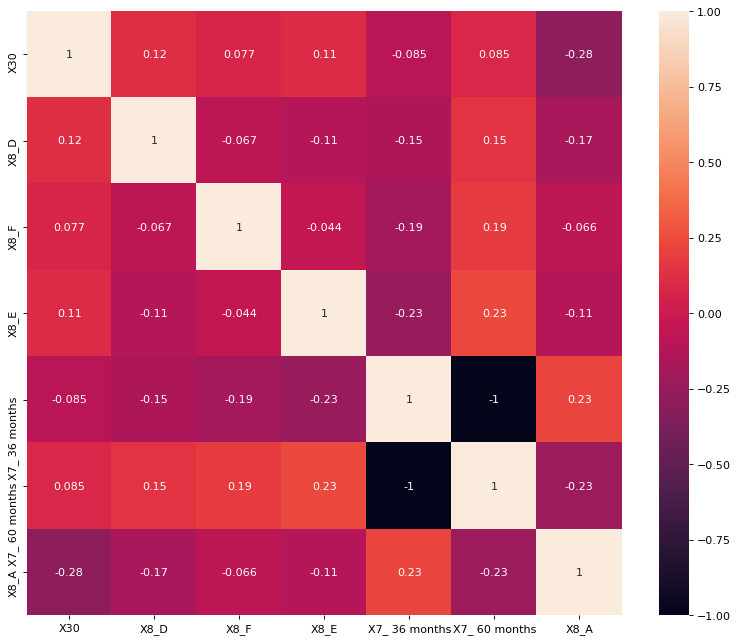

In [19]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr2 = Numeric_df[['X30' , 'X8_D' , 'X8_F' , 'X8_E' , 
                    'X7_ 36 months' , 'X7_ 60 months' , 'X8_A']].corr()

sns.heatmap(corr2, annot=True, fmt=".2g")

In [352]:
#dropping X7_60months since X7_36months provides enough information(if X7_36months = 0, it means it is 60months)
X1 = X1.drop('X7_ 60 months', axis=1)
#X1 = X1.drop('Y', axis=1)
X1

,X5,X9,X13,X21,X22,X24,X27,X28,X29,X30,...,X20_TX,X20_UT,X20_VA,X20_VT,X20_WA,X20_WI,X20_WV,X20_WY,X32_f,X32_w
0,25000.0,8,85000.0,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,...,0,0,0,0,0,0,0,0,1,0
1,7000.0,9,65000.0,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,...,0,0,0,0,0,0,0,0,1,0
2,25000.0,17,70000.0,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,...,0,0,0,0,0,0,0,0,1,0
3,1200.0,11,54000.0,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,...,1,0,0,0,0,0,0,0,1,0
4,10800.0,12,32000.0,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,10000.0,10,50000.0,21.51,0.0,0.0,9.0,0.0,10268.0,0.761,...,0,0,0,0,0,0,0,0,0,1
399996,13150.0,16,30000.0,29.76,0.0,0.0,11.0,0.0,8931.0,0.378,...,1,0,0,0,0,0,0,0,1,0
399997,20000.0,7,99000.0,24.13,0.0,0.0,14.0,0.0,28976.0,0.693,...,1,0,0,0,0,0,0,0,0,1
399998,18475.0,18,42000.0,31.43,0.0,0.0,19.0,0.0,11982.0,0.390,...,1,0,0,0,0,0,0,0,1,0


In [91]:
xcorr = X1.corr(method ='pearson')
xcorr[abs(xcorr)>0.5]

,X5,X13,X21,X22,X24,X27,X28,X29,X30,X31,X7_ 36 months,X8_A,X8_B,X8_C,X8_D,X8_E,X8_F,X8_G,X11_1 year,X11_10+ years,X11_2 years,X11_3 years,X11_4 years,X11_5 years,X11_6 years,X11_7 years,X11_8 years,X11_9 years,X11_< 1 year,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X17_car,X17_credit_card,X17_debt_consolidation,X17_educational,X17_home_improvement,X17_house,X17_major_purchase,X17_medical,X17_moving,X17_other,X17_renewable_energy,X17_small_business,X17_vacation,X17_wedding,X20_AK,X20_AL,X20_AR,X20_AZ,X20_CA,X20_CO,X20_CT,X20_DC,X20_DE,X20_FL,X20_GA,X20_HI,X20_IA,X20_ID,X20_IL,X20_IN,X20_KS,X20_KY,X20_LA,X20_MA,X20_MD,X20_ME,X20_MI,X20_MN,X20_MO,X20_MS,X20_MT,X20_NC,X20_NE,X20_NH,X20_NJ,X20_NM,X20_NV,X20_NY,X20_OH,X20_OK,X20_OR,X20_PA,X20_RI,X20_SC,X20_SD,X20_TN,X20_TX,X20_UT,X20_VA,X20_VT,X20_WA,X20_WI,X20_WV,X20_WY,X32_f,X32_w,X27/X31
X5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X13,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X21,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X22,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X24,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X27,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.678231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X28,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [353]:
#X1['X27/X31'] = X1['X27']/X1['X31']
X1 = X1.drop('X32_w', axis=1)
#X1 = X1.drop('X27', axis=1)
#X1 = X1.drop('X31', axis=1)
X1 = X1.drop('X12_MORTGAGE', axis=1)
#X1 = X1.drop('X17_debt_consolidation', axis=1)

In [354]:
xcorr = X1.corr(method ='pearson')
#xcorr[abs(xcorr)>0.5]
c = xcorr.abs()
s = c.unstack()
so = s.sort_values(ascending = False)
so = so[so < 1]
print(so)
#subset(xcorrdf, abs(Freq) > 0.5) 

X31                     X27                       6.778655e-01
X27                     X31                       6.778655e-01
X17_credit_card         X17_debt_consolidation    6.362001e-01
X17_debt_consolidation  X17_credit_card           6.362001e-01
X14_not verified        X14_VERIFIED - income     5.289272e-01
                                                      ...     
X20_ME                  X12_ANY                   5.899940e-06
X11_5 years             X17_educational           4.461783e-06
X17_educational         X11_5 years               4.461783e-06
X20_PA                  X9                        7.989507e-07
X9                      X20_PA                    7.989507e-07
Length: 9120, dtype: float64


In [239]:
print(pd.options.display.max_columns,pd.options.display.max_rows)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

None None


In [355]:
X1

,X5,X9,X13,X21,X22,X24,X27,X28,X29,X30,...,X20_TN,X20_TX,X20_UT,X20_VA,X20_VT,X20_WA,X20_WI,X20_WV,X20_WY,X32_f
0,25000.0,8,85000.0,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,...,0,0,0,0,0,0,0,0,0,1
1,7000.0,9,65000.0,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,...,0,0,0,0,0,0,0,0,0,1
2,25000.0,17,70000.0,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,11,54000.0,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,...,0,1,0,0,0,0,0,0,0,1
4,10800.0,12,32000.0,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,10000.0,10,50000.0,21.51,0.0,0.0,9.0,0.0,10268.0,0.761,...,0,0,0,0,0,0,0,0,0,0
399996,13150.0,16,30000.0,29.76,0.0,0.0,11.0,0.0,8931.0,0.378,...,0,1,0,0,0,0,0,0,0,1
399997,20000.0,7,99000.0,24.13,0.0,0.0,14.0,0.0,28976.0,0.693,...,0,1,0,0,0,0,0,0,0,0
399998,18475.0,18,42000.0,31.43,0.0,0.0,19.0,0.0,11982.0,0.390,...,0,1,0,0,0,0,0,0,0,1


In [369]:
#Create a different dataframe with highly reduced features for possible later use.
x_Reduced = X1[['X30','X9']]
x_Reduced

#'X7_ 36 months'

,X30,X9
0,0.521,8
1,0.767,9
2,0.663,17
3,0.404,11
4,0.256,12
...,...,...
399995,0.761,10
399996,0.378,16
399997,0.693,7
399998,0.390,18


## Step 2:
#### Build your models: Please build machine learning/statistical models in Python to predict the interest rate assigned to a loan. When writing the code associated with each model, please have the first part produce and save the model, followed by a second part that loads and applies the model.

In [ ]:
#Since our target variable is a continuous numerical feature,
#I am narrowing down the algorithms to the regressor ones: 
# DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor

In [356]:
from sklearn.model_selection import train_test_split
SEED = 1
(x_train, x_test, y_train, y_test) = train_test_split(X1, Y,test_size=0.3, random_state=SEED)

In [ ]:
### Random Forest

In [367]:
# Instantiate a random forests regressor 'rf' 400 estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

rf = RandomForestRegressor(n_estimators=400,
max_depth=8,
min_samples_leaf=0.13,random_state=SEED)
# Fit 'rf' to the training set
rf.fit(x_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(x_test)
y_pred_train=rf.predict(x_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.10f}'.format(rmse_test))
print('Train set RMSE of rf: {:.10f}'.format(rmse_train))

Test set RMSE of rf: 0.0253305483
Train set RMSE of rf: 0.0254425769


In [380]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.10f}'.format(RMSE_CV))

CV RMSE: 0.0298920731


In [372]:
from sklearn.model_selection import train_test_split
SEED = 3
(x_train, x_test, y_train, y_test) = train_test_split(x_Reduced, Y,test_size=0.2, random_state=SEED)

In [379]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

rf = RandomForestRegressor(n_estimators=400,
max_depth=8,
min_samples_leaf=0.15,random_state=SEED)
#FIT REDUCED X
rf.fit(x_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(x_test)
y_pred_train=rf.predict(x_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:10f}'.format(rmse_test))
print('Train set RMSE of rf: {:.10f}'.format(rmse_train))

Test set RMSE of rf:   0.029745
Train set RMSE of rf: 0.0298917229


In [381]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,index = x_Reduced.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values(ascending=False)
# Make a horizontal bar plot
#sorted_importances_rf.plot(kind='barh', color='blue')
#plt.show()
sorted_importances_rf[0:20]

X9     1.0
X30    0.0
dtype: float64

In [ ]:
### Decision Trees

In [252]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=SEED)


dt.fit(x_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = dt.predict(x_test)
y_pred_train=dt.predict(x_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.10f}'.format(rmse_test))
print('Train set RMSE of rf: {:.10f}'.format(rmse_train))

Test set RMSE of rf: 0.02349630089039603242
Train set RMSE of rf: 0.02373582974617313712


In [ ]:
### Linear Regression

In [382]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
lr = LinearRegression() 

lr.fit(x_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = lr.predict(x_test)
y_pred_train=lr.predict(x_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.10f}'.format(rmse_test))
print('Train set RMSE of rf: {:.10f}'.format(rmse_train))

Test set RMSE of rf: 0.0208268381
Train set RMSE of rf: 0.0209871944


In [383]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(lr, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.10f}'.format(RMSE_CV))

CV RMSE: 0.0209875180


In [ ]:
### Gradient Boosting

In [384]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=SEED)

# Fit gb to the training set
gb.fit(x_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(x_test)
# Compute MSE
mse_test = MSE(y_test, y_pred_Gboost)
# Compute RMSE
rmse_test = mse_test**(1/2)
# Print RMSE
print('Test set RMSE of gb: {:.10f}'.format(rmse_test))

y_pred_train=gb.predict(x_train)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
print('Train set RMSE of gb: {:.10f}'.format(rmse_train))

Test set RMSE of gb: 0.0184270425
Train set RMSE of gb: 0.0185897059


In [385]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(gb, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.10f}'.format(RMSE_CV))

CV RMSE: 0.0186418629


## Step 3:
#### Test your models using the data found within the "Holdout for Testing" file. Save the results of the final model (remember you will only predict the first column in holdout test set with your best model results) in a single, separate CSV titled "Results from" *insert your name or UChicago net ID.

In [410]:
#data importing
dat = pd.read_csv('Holdout for Testing.csv')
dat

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,NaN,38272852,41056632,"$6,400","$6,400","$6,400",36 months,A,A2,Supervisor,...,6-Apr,0,NaN,NaN,13,0,7185,47.90%,15,f
79996,NaN,38232598,41016384,"$30,000","$30,000","$30,000",60 months,E,E2,Manager,...,Aug-96,0,NaN,NaN,19,0,25151,51.30%,38,f
79997,NaN,38282597,41066378,"$17,600","$17,600","$17,600",36 months,D,D4,Field Unit Supervisor,...,4-Dec,0,32.0,NaN,18,0,12161,37.10%,36,f
79998,NaN,38232613,41016400,"$2,500","$2,500","$2,500",36 months,C,C2,Senior Project Manager,...,Jun-99,0,NaN,NaN,13,0,13031,76.70%,23,f


In [411]:
# summarize the number of rows with missing values for each column
column_delete = []
for i in range(dat.shape[1]):
    # count number of rows with missing values
    n_miss = dat.iloc[:,i].isnull().sum()
    perc = n_miss / dat.shape[0] * 100
    if perc > 50:
        column_delete.append(i)
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
print(column_delete)

> 0, Missing: 80000 (100.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 4394 (5.5%)
> 10, Missing: 4382 (5.5%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 79985 (100.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 38704 (48.4%)
> 25, Missing: 66161 (82.7%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 30 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 0 (0.0%)
[0, 15, 25]


In [412]:
X = dat.drop(dat.columns[[0,15,25]], axis=1)
X = X.drop(['X10', 'X11', 'X25'], axis=1)
X

,X2,X3,X4,X5,X6,X7,X8,X9,X12,X13,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,MORTGAGE,68000.0,...,28.31,0,2-Nov,1,18,0,19861,64.50%,33,f
1,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,RENT,110480.0,...,16.03,0,Dec-68,1,12,0,17001,26.20%,36,w
2,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,MORTGAGE,86000.0,...,32.49,0,Oct-98,0,16,0,25797,49.90%,33,w
3,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,RENT,30000.0,...,32.96,0,Feb-99,1,13,1,9586,43.80%,21,w
4,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,MORTGAGE,82500.0,...,31.03,0,2-Dec,0,27,0,31842,41.30%,43,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,38272852,41056632,"$6,400","$6,400","$6,400",36 months,A,A2,MORTGAGE,50000.0,...,15.74,0,6-Apr,0,13,0,7185,47.90%,15,f
79996,38232598,41016384,"$30,000","$30,000","$30,000",60 months,E,E2,MORTGAGE,92000.0,...,19.28,0,Aug-96,0,19,0,25151,51.30%,38,f
79997,38282597,41066378,"$17,600","$17,600","$17,600",36 months,D,D4,MORTGAGE,70000.0,...,17.50,0,4-Dec,0,18,0,12161,37.10%,36,f
79998,38232613,41016400,"$2,500","$2,500","$2,500",36 months,C,C2,MORTGAGE,80000.0,...,16.52,0,Jun-99,0,13,0,13031,76.70%,23,f


In [413]:
X['X30'] = X['X30'].str.rstrip('%').astype(float)/100
X['X30']

0        0.645
1        0.262
2        0.499
3        0.438
4        0.413
         ...  
79995    0.479
79996    0.513
79997    0.371
79998    0.767
79999    0.937
Name: X30, Length: 80000, dtype: float64

In [414]:
for i in range(X.shape[1]):
    # count number of rows with missing values
    n_miss = X.iloc[:,i].isnull().sum()
    perc = n_miss / X.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 30 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)


In [415]:
#Version2: We fill in missing values:
print(X.columns[X.isnull().any()])
X['X30'] = X['X30'].fillna(value = X['X30'].mean())
print(X.columns[X.isnull().any()])

Index(['X30'], dtype='object')
Index([], dtype='object')


In [416]:
#LABEL ENCODING BLOCK: We transform the categorical features for which THE ORDER MATTERS using label encoding
X['X9'], uniques = pd.factorize(X['X9'], sort=True)
print(X['X9'])
print(uniques)
X

0        14
1         0
2        11
3        15
4         5
         ..
79995     1
79996    21
79997    18
79998    11
79999     9
Name: X9, Length: 80000, dtype: int64
Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')


,X2,X3,X4,X5,X6,X7,X8,X9,X12,X13,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,14,MORTGAGE,68000.0,...,28.31,0,2-Nov,1,18,0,19861,0.645,33,f
1,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,0,RENT,110480.0,...,16.03,0,Dec-68,1,12,0,17001,0.262,36,w
2,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,11,MORTGAGE,86000.0,...,32.49,0,Oct-98,0,16,0,25797,0.499,33,w
3,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,15,RENT,30000.0,...,32.96,0,Feb-99,1,13,1,9586,0.438,21,w
4,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,5,MORTGAGE,82500.0,...,31.03,0,2-Dec,0,27,0,31842,0.413,43,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,38272852,41056632,"$6,400","$6,400","$6,400",36 months,A,1,MORTGAGE,50000.0,...,15.74,0,6-Apr,0,13,0,7185,0.479,15,f
79996,38232598,41016384,"$30,000","$30,000","$30,000",60 months,E,21,MORTGAGE,92000.0,...,19.28,0,Aug-96,0,19,0,25151,0.513,38,f
79997,38282597,41066378,"$17,600","$17,600","$17,600",36 months,D,18,MORTGAGE,70000.0,...,17.50,0,4-Dec,0,18,0,12161,0.371,36,f
79998,38232613,41016400,"$2,500","$2,500","$2,500",36 months,C,11,MORTGAGE,80000.0,...,16.52,0,Jun-99,0,13,0,13031,0.767,23,f


In [417]:
X.columns

Index(['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X12', 'X13', 'X14',
       'X15', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X27',
       'X28', 'X29', 'X30', 'X31', 'X32'],
      dtype='object')

In [418]:
#We only use two features, X9, X30 to predict the test dataset.
x_Reduced = X[['X30','X9']]
x_Reduced

,X30,X9
0,0.645,14
1,0.262,0
2,0.499,11
3,0.438,15
4,0.413,5
...,...,...
79995,0.479,1
79996,0.513,21
79997,0.371,18
79998,0.767,11


In [419]:
import csv
# Compute y_pred
y_pred = lr.predict(x_Reduced)
# Export the output as a csv file
result = pd.DataFrame(data = y_pred, columns = ['X1'])
result.to_csv('Results_from_Ran(Rose)_Ro.csv', index=False)

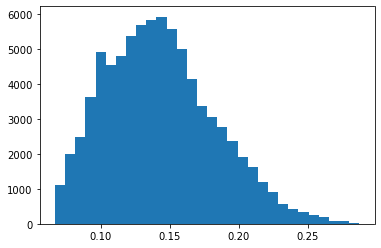

In [420]:
plt.hist(y_pred, bins = 30)
plt.show()

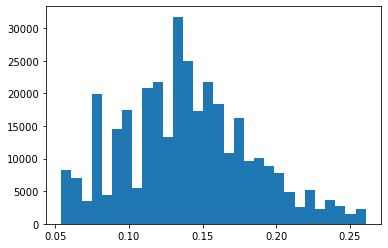

In [421]:
plt.hist(Y, bins = 30)
plt.show()